In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_files
from sklearn.model_selection import GridSearchCV
import numpy as np
import mglearn
import matplotlib.pyplot as plt
reviews_train = load_files("data/aclImdb/train/")
#unsup_index = reviews_train.target_names.index('unsup')
text_train = []
y_train = []
for t, y in zip(reviews_train.data, reviews_train.target):
    if y != unsup_index:
        text_train.append(t)
        y_train.append(y)

print("Number of documents in train data: {}".format(len(text_train)))
print("Samples per class (train): {}".format(np.bincount(y_train)))



Number of documents in train data: 25000
Samples per class (train): [12500 12500]


In [5]:
reviews_test = load_files("data/aclImdb/test/")
text_test = []
y_test = []
for t, y in zip(reviews_test.data, reviews_test.target):
    #if y != unsup_index_test:
    text_test.append(t)
    y_test.append(y)

print("Number of documents in test data: {}".format(len(text_test)))
print("Samples per class (test): {}".format(np.bincount(y_test)))




Number of documents in test data: 25000
Samples per class (test): [12500 12500]


In [9]:
vect = CountVectorizer(min_df=5, ngram_range=(2, 2))
X_train = vect.fit(text_train).transform(text_train)
X_test = vect.transform(text_test)

print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("X_train:\n{}".format(repr(X_train)))
print("X_test: \n{}".format(repr(X_test)))

feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))




Vocabulary size: 129549
X_train:
<25000x129549 sparse matrix of type '<class 'numpy.int64'>'
	with 3607330 stored elements in Compressed Sparse Row format>
X_test: 
<25000x129549 sparse matrix of type '<class 'numpy.int64'>'
	with 3392376 stored elements in Compressed Sparse Row format>
Number of features: 129549


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best cross-validation score: 0.88
Best parameters:  {'C': 0.1}
Best estimator:  LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


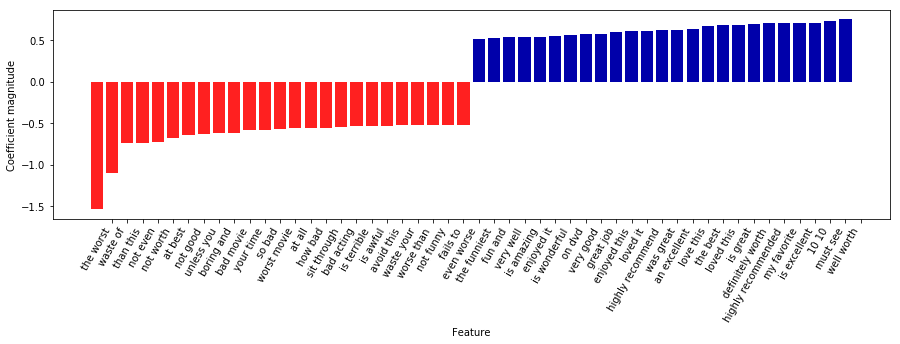

Score: 0.88


In [11]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, feature_names, n_top_features=25)
plt.show()

lr = grid.best_estimator_
lr.predict(X_test)
print("Score: {:.2f}".format(lr.score(X_test, y_test)))

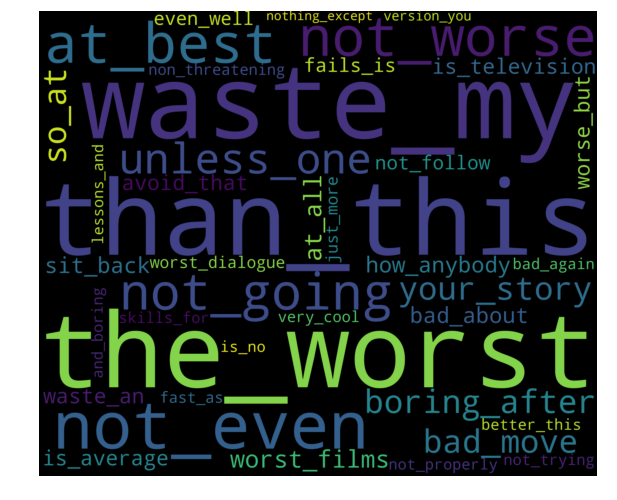

In [57]:
coef=lr.coef_[0].tolist()
str=[]
max_feature_num=40
for i in range(max_feature_num):
    max_index=coef.index(min(coef))
    str.append(feature_names[max_index].replace(' ','_'))
    del coef[max_index]
str=' '.join(str)
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
def GenerateWordCloud(WordList):
    plt.figure(figsize=(10,10))
    wordcloud = WordCloud(background_color="black",width=3000,height=2500).generate(WordList)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
GenerateWordCloud(str)

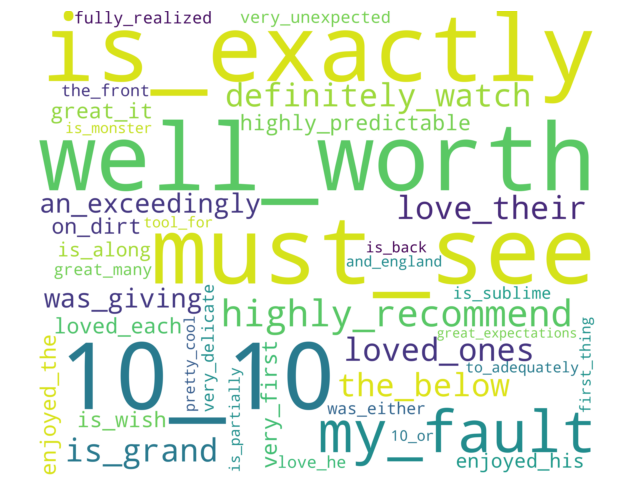

In [59]:
coef=lr.coef_[0].tolist()
str=[]
max_feature_num=40
for i in range(max_feature_num):
    max_index=coef.index(max(coef))
    str.append(feature_names[max_index].replace(' ','_'))
    del coef[max_index]
str=' '.join(str)
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
def GenerateWordCloud(WordList):
    plt.figure(figsize=(10,10))
    wordcloud = WordCloud(background_color="white",width=3000,height=2500).generate(WordList)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
GenerateWordCloud(str)

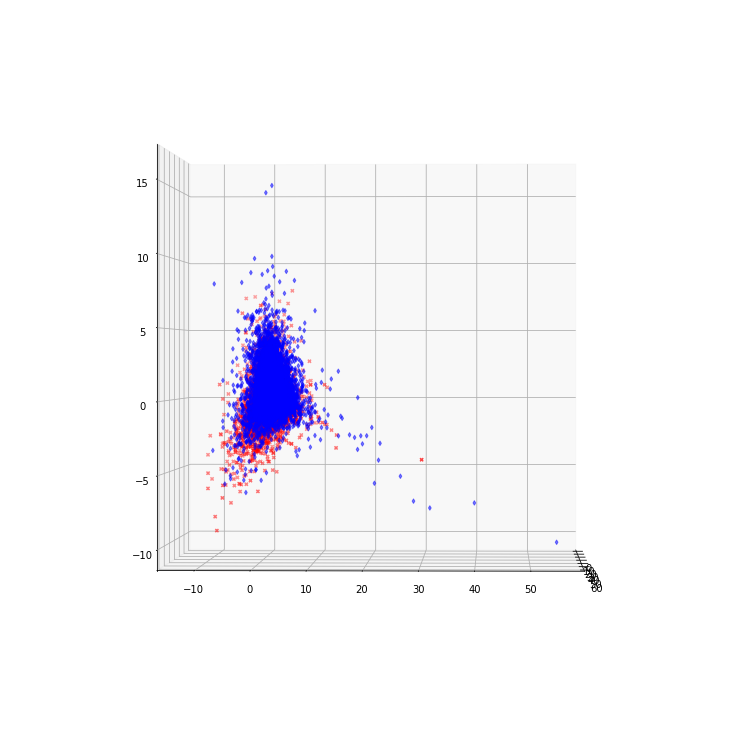

12310 3.6204196902285224 -0.13646817307954034 12690 3.5045779207814642 -0.4621466355665969


In [359]:
import matplotlib.pyplot as plt                 #加载matplotlib用于数据的可视化
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import TruncatedSVD          
from sklearn.decomposition import PCA
from sklearn import manifold
from mpl_toolkits.mplot3d import Axes3D
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
pca=TruncatedSVD(n_components=3)
reduced_x=pca.fit_transform(X_test)
pos_x,pos_y,pos_z=[],[],[]
neg_x,neg_y,neg_z=[],[],[]
Y_pre=lr.predict(X_test)
x=0
x1=0
x2=0
x3=0
y=0
y1=0
y2=0
y3=0
for i in range(len(Y_pre)):
    if Y_pre[i]==0:
        neg_x.append(reduced_x[i][0])
        neg_y.append(reduced_x[i][1])
        neg_z.append(reduced_x[i][2])
        x=x+1
        x1=x1+reduced_x[i][0]
        x2=x2+reduced_x[i][1]
        x3=x3+reduced_x[i][2]
    else:
        pos_x.append(reduced_x[i][0])
        pos_y.append(reduced_x[i][1])
        pos_z.append(reduced_x[i][2])
        y=y+1
        y1=y1+reduced_x[i][0]
        y2=y2+reduced_x[i][1]
        y3=y3+reduced_x[i][2]

fig = plt.figure(figsize=(10,10))
ax=Axes3D(fig,elev=0,azim=1.7598749749712757)
ax.scatter(pos_x,pos_y,pos_z,c='r',marker='x',s=10)
ax.scatter(neg_x,neg_y,neg_z,c='b',marker='d',s=10,alpha=0.5)
plt.show()#显示模块中的所有绘图对象
print(x,x1/x,x2/x,y,y1/y,y2/y)

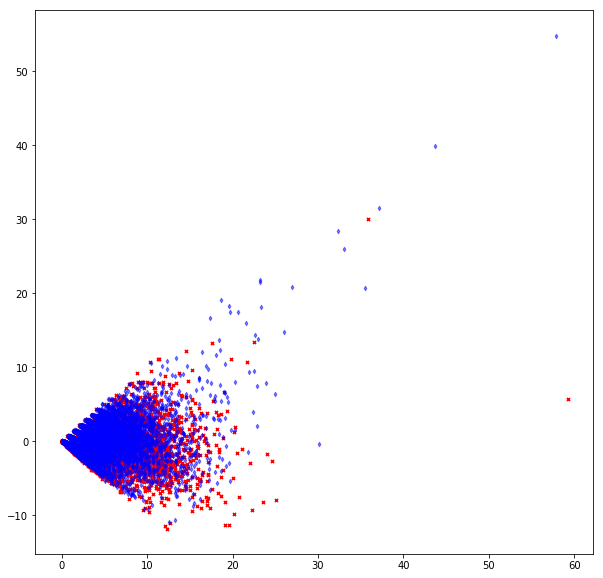

In [369]:
import matplotlib.pyplot as plt
from sklearn import manifold
from sklearn.decomposition import TruncatedSVD 
Trun=TruncatedSVD(n_components=20)
X_temp=Trun.fit_transform(X_test)
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X_temp)
pos_x,pos_y=[],[]
neg_x,neg_y=[],[]
Y_pre=lr.predict(X_test)
for i in range(len(Y_pre)):
    if Y_pre[i]==0:
        neg_x.append(reduced_x[i][0])
        neg_y.append(reduced_x[i][1])
    else:
        pos_x.append(reduced_x[i][0])
        pos_y.append(reduced_x[i][1])
plt.figure(figsize=(10,10))
plt.scatter(pos_x,pos_y,c='r',marker='x',s=10)
plt.scatter(neg_x,neg_y,c='b',marker='d',s=10,alpha=0.5)
plt.show()#显示模块中的所有绘图对象

In [344]:
lr.score(X_test, y_test)

0.88008

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<Figure size 432x288 with 0 Axes>

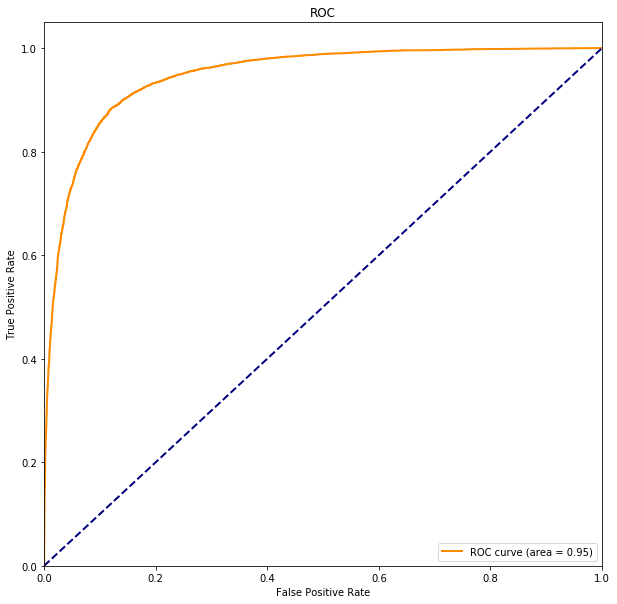

In [61]:
from sklearn.metrics import roc_curve, auc
%matplotlib inline
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
Y_pre=grid.fit(X_train, y_train).decision_function(X_test)
fpr,tpr,threshold = roc_curve(y_test,Y_pre) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

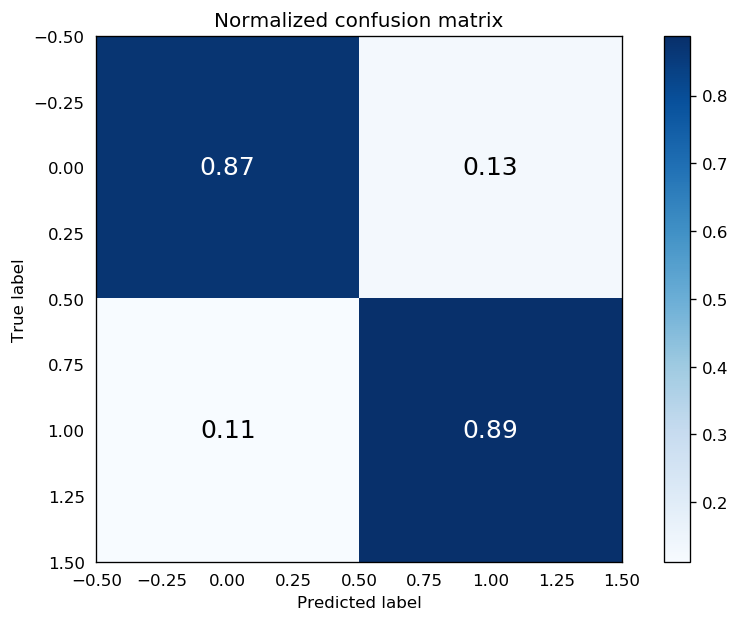

In [99]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
def plot_confusion_matrix(cm, title='Confusion Matrix', cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
y_pre=lr.predict(X_test)
cm = confusion_matrix(y_test,y_pre)
np.set_printoptions(precision=2)
cm_normalized = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(9,6), dpi=120)
ind_array = np.arange(2)
x, y = np.meshgrid(ind_array, ind_array)
 
for x_val, y_val in zip(x.flatten(), y.flatten()):
    thresh = cm_normalized.max()/2
    c = cm_normalized[y_val][x_val]
    if (c > 0.01):
        plt.text(x_val, y_val, "%0.2f" %(c,), color='white' if cm_normalized[x_val, y_val] > thresh else "black", fontsize=15, va='center', ha='center')
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.grid(True, which='minor', linestyle='-')
plt.gcf().subplots_adjust(bottom=0.15)
 
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
#show confusion matrix
plt.show()